# Big Data - UFAM
### Nome: Sthefanie Jofer Gomes Passo

Os experimentos devem ser feitos usando os documentos da coleção “20 Newsgroups” que aproximadamente 18.000 mensagens de 20 newsgroups distintos. Todas as mensagens de um mesmos newsgroup estão em um arquivo txt cujo nome indica o newsgroup e que deve ser usado como rótulo para os proceso de treino, teste e avaliação. O pré-processamento destes arquivos faz parte do trabalho.

In [106]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

Aqui estão todos os tipos de grupos presentes na base:

In [107]:
from pprint import pprint
pprint(list(newsgroups_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


É possivel delimir somente alguns grupos para fazer o treinamento, no meu caso procurei fazer com todos.

In [108]:
categories = [
 'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'
]

In [109]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [110]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [111]:
len(twenty_train.data)

11314

In [112]:
len(twenty_train.filenames)

11314

In [113]:
print("\n".join(twenty_train.data[0].split("\n")[:3]))

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu


In [114]:
print(twenty_train.target_names[twenty_train.target[0]])

rec.autos


Requerimentos para trabalhar com os dados

In [115]:
twenty_train.target[:10]

array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

Dados de Treino \ Teste

In [116]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

rec.autos
comp.sys.mac.hardware
comp.sys.mac.hardware
comp.graphics
sci.space
talk.politics.guns
sci.med
comp.sys.ibm.pc.hardware
comp.os.ms-windows.misc
comp.sys.mac.hardware


In [117]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(11314, 130107)

In [118]:
count_vect.vocabulary_.get(u'algorithm')

27366

In [119]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(11314, 130107)

In [120]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 130107)

### Filtrando textos para treinos mais reais

Classificação dos 20 grupos

In [121]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [169]:
docs_new = ['Doctor','Football','Market','Jesus']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'Doctor' => sci.med
'Football' => rec.sport.baseball
'Market' => sci.crypt
'Jesus' => soc.religion.christian


In [122]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                    ])

In [156]:
text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [124]:
import numpy as np
twenty_test = fetch_20newsgroups(subset='test',
                                 categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

0.7738980350504514

In [125]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2', 
                                           alpha=1e-3, random_state=42,
                                           max_iter=5, tol=None)),
                    ])
text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [126]:
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

0.8248805098247477

### Predição, Recall, Score e Suport das classificações feitas
Note que os resultados ficaram entre 80% de precisão, isso poderia ser maior se tivesse a redução de grupos no treino

In [155]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predicted, 
                                    target_names=twenty_test.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.73      0.71      0.72       319
           comp.graphics       0.78      0.72      0.75       389
 comp.os.ms-windows.misc       0.73      0.78      0.75       394
comp.sys.ibm.pc.hardware       0.74      0.67      0.70       392
   comp.sys.mac.hardware       0.81      0.83      0.82       385
          comp.windows.x       0.84      0.76      0.80       395
            misc.forsale       0.84      0.90      0.87       390
               rec.autos       0.91      0.90      0.90       396
         rec.motorcycles       0.93      0.96      0.95       398
      rec.sport.baseball       0.88      0.90      0.89       397
        rec.sport.hockey       0.88      0.99      0.93       399
               sci.crypt       0.84      0.96      0.90       396
         sci.electronics       0.83      0.62      0.71       393
                 sci.med       0.87      0.86      0.87       396
         

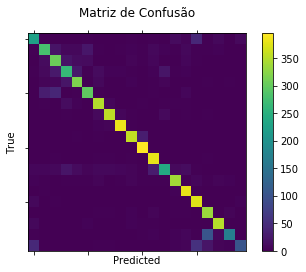

In [145]:
from sklearn.metrics import confusion_matrix

labels = []
cm = metrics.confusion_matrix(twenty_test.target, predicted)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Matriz de Confusão')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [129]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3),
             }

In [130]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)

In [131]:
gs_clf = gs_clf.fit(twenty_train.data[:400], twenty_train.target[:400])

Nesse ponto a predição ja está ocorrendo:

In [175]:
twenty_train.target_names[gs_clf.predict(['Big Data'])[0]]

'comp.sys.mac.hardware'

In [133]:
gs_clf.best_score_

0.6275

In [134]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.001
tfidf__use_idf: True
vect__ngram_range: (1, 1)


In [135]:
twenty_test.target[:3]

array([7, 5, 0])

#### Referencias Utilizadas:
https://towardsdatascience.com/multi-class-text-classification-with-doc2vec-logistic-regression-9da9947b43f4
https://raoumer.github.io/blog_posts/docs_classification_ML.html
https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html
https://scikit-learn.org/stable/modules/cross_validation.html
